# Random Walk

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

Populating the interactive namespace from numpy and matplotlib


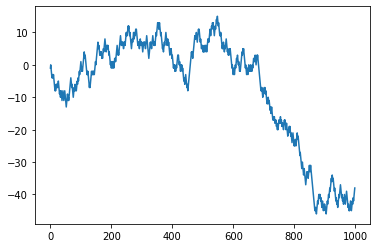

In [3]:
%pylab inline
from random import seed
from random import random
seed(156)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	movement = -1 if random() < 0.5 else 1
	value = random_walk[i-1] + movement
	random_walk.append(value)
plt.plot(random_walk)
plt.show()

# Autocorrelation

In [2]:
%pip install pandas

     |████████████████████████████████| 10.4MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 512kB 15.6MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


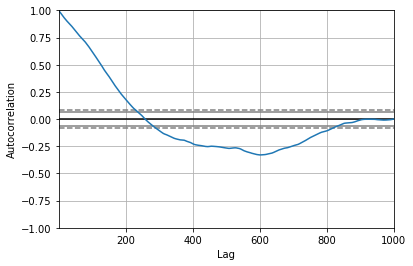

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(random_walk)

In [7]:
%pip install statsmodels
from statsmodels.tsa.stattools import adfuller
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

     |████████████████████████████████| 8.1MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 235kB 20.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
ADF Statistic: -0.111714
p-value: 0.948259
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


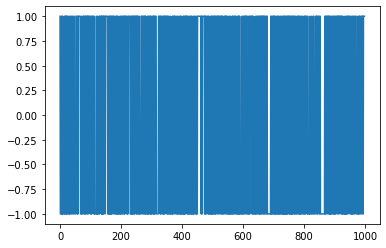

In [8]:
# take difference
diff = list()
for i in range(1, len(random_walk)):
	value = random_walk[i] - random_walk[i - 1]
	diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

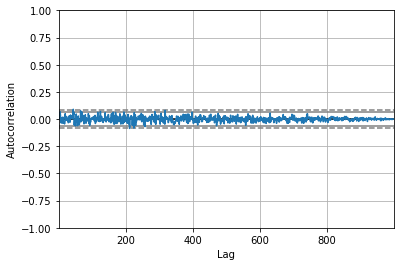

In [9]:
autocorrelation_plot(diff)

In [11]:
%pip install sklearn
from sklearn.metrics import mean_squared_error
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence : the best forecast we can have with random walk process
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
error = mean_squared_error(test, predictions)
print('Persistence MSE: %.3f' % error)

     |████████████████████████████████| 6.7MB 2.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/cd/c1/50a758e8247561e58cb87305b1e90b171b8c767b15b12a1734001f41d356/joblib-0.13.2-py2.py3-none-any.whl
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=529f5021af0e7806aee4023a84a835e73afc6bb5efd9b56bf1491bcefca215db
  Stored in directory: /home/alexv/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.
Persistence MSE: 1.000
